Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


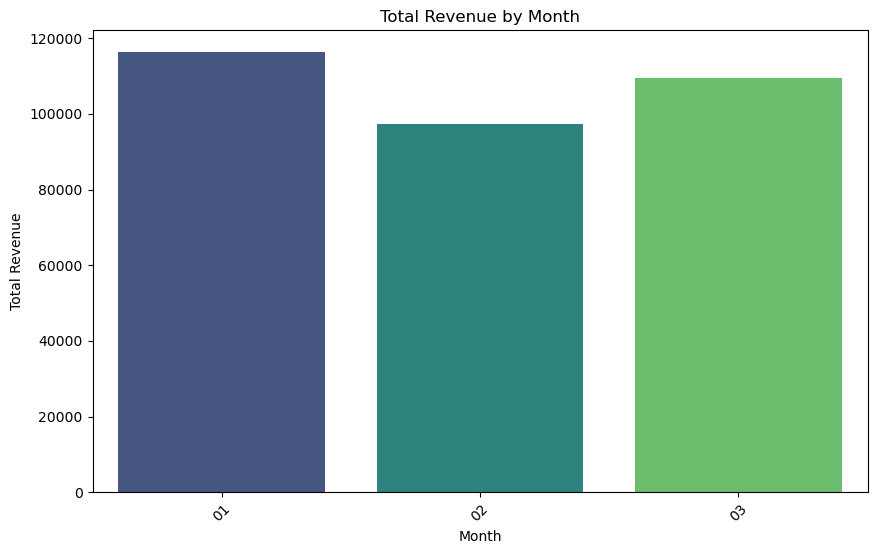

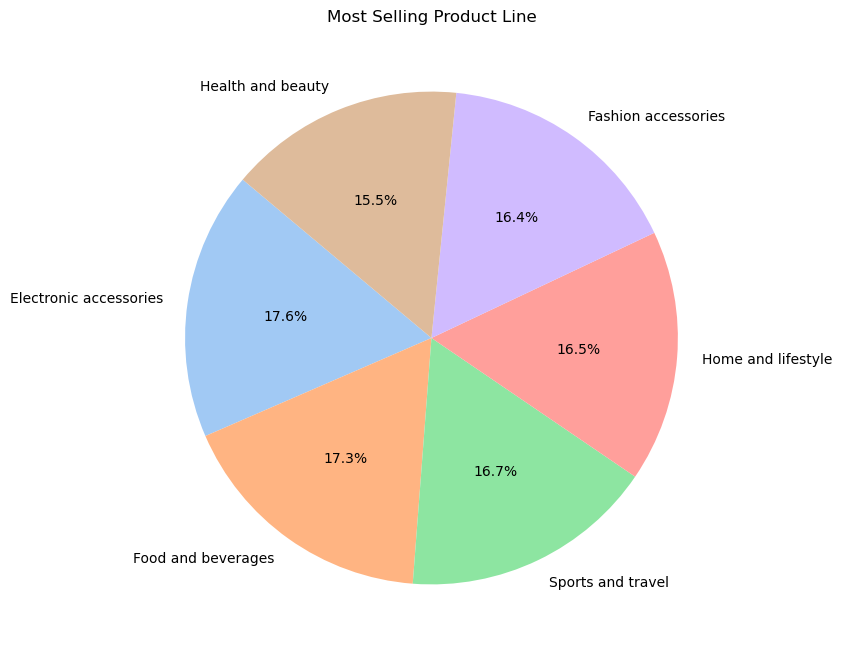

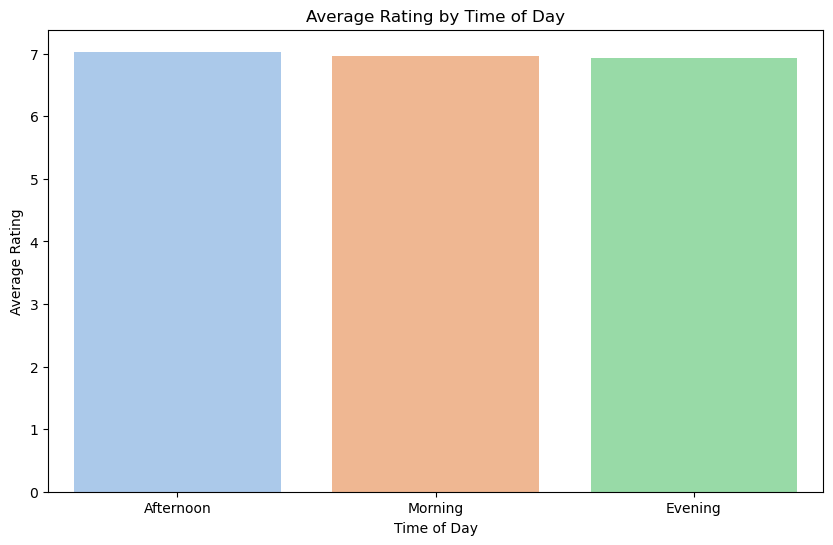

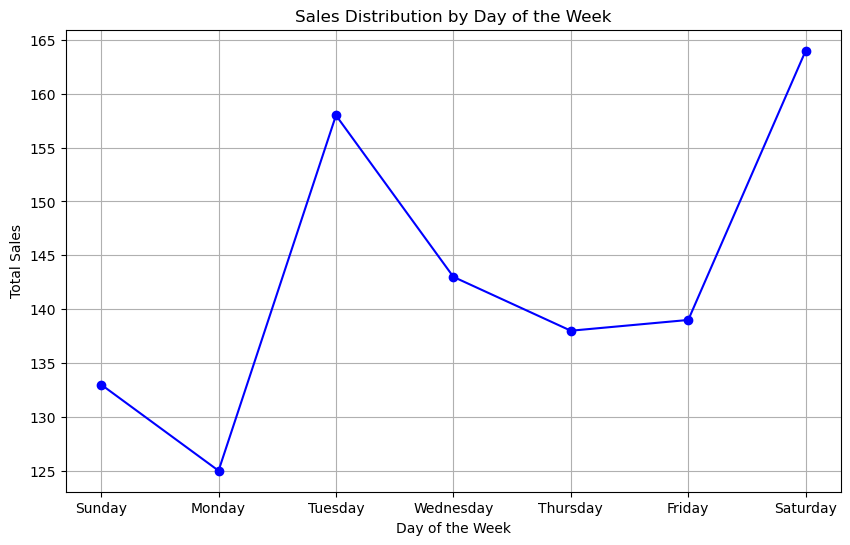

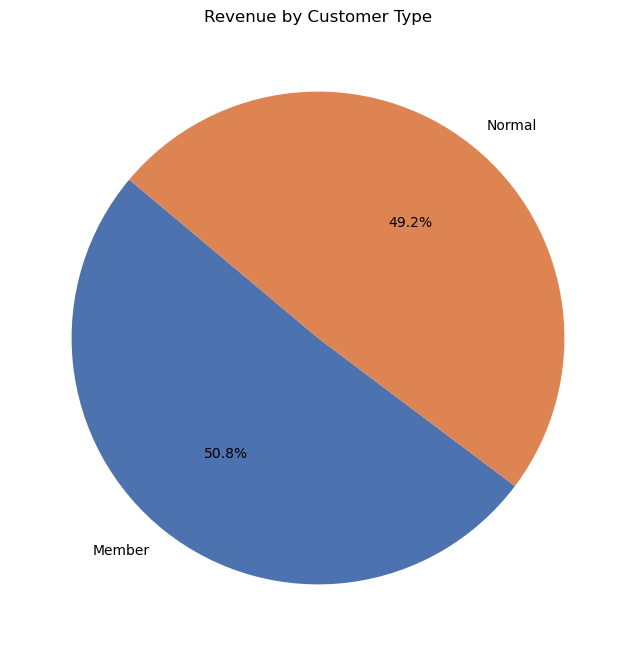

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
csv_file = "E:\Sales\Sales.csv"  # Replace with the path to your CSV file
sales_df = pd.read_csv(csv_file)

# Print column names to verify
print(sales_df.columns)

# Convert necessary columns to appropriate data types
sales_df['Date'] = pd.to_datetime(sales_df['Date'].str.strip())
sales_df['Time'] = pd.to_datetime(sales_df['Time'].str.strip()).dt.time

# Create a connection to an in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Create the sales table in SQLite and insert data
sales_df.to_sql('sales', conn, if_exists='append', index=False)

# Visualization 1: Total Revenue by Month (Bar Chart)
total_revenue_by_month = pd.read_sql('''
SELECT
    strftime('%m', Date) AS month,
    SUM(Total) AS total_revenue
FROM sales
GROUP BY month
ORDER BY month
''', conn)

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='total_revenue', data=total_revenue_by_month, palette='viridis')
plt.title('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

# Visualization 2: Most Selling Product Line (Pie Chart)
most_selling_product_line = pd.read_sql('''
SELECT
    SUM(Quantity) AS qty,
    [Product line] AS product_line
FROM sales
GROUP BY product_line
ORDER BY qty DESC
''', conn)

plt.figure(figsize=(8, 8))
plt.pie(most_selling_product_line['qty'], labels=most_selling_product_line['product_line'],
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Most Selling Product Line')
plt.show()

# Visualization 3: Average Rating by Time of Day (Bar Chart)
time_of_day_ratings = pd.read_sql('''
SELECT
    (CASE
        WHEN Time BETWEEN "00:00:00" AND "12:00:00" THEN "Morning"
        WHEN Time BETWEEN "12:01:00" AND "16:00:00" THEN "Afternoon"
        ELSE "Evening"
    END) AS time_of_day,
    AVG(Rating) AS avg_rating
FROM sales
GROUP BY time_of_day
ORDER BY avg_rating DESC
''', conn)

plt.figure(figsize=(10, 6))
sns.barplot(x='time_of_day', y='avg_rating', data=time_of_day_ratings, palette='pastel')
plt.title('Average Rating by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Rating')
plt.show()

# Visualization 4: Sales Distribution by Day of the Week (Line Graph)
sales_by_day = pd.read_sql('''
SELECT
    strftime('%w', Date) AS day_of_week,
    COUNT(*) AS total_sales
FROM sales
GROUP BY day_of_week
ORDER BY day_of_week
''', conn)

# Define labels for the days of the week
day_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Convert day_of_week to integer for indexing labels
sales_by_day['day_of_week'] = sales_by_day['day_of_week'].astype(int)

plt.figure(figsize=(10, 6))
plt.plot(day_labels, sales_by_day['total_sales'], marker='o', linestyle='-', color='b')
plt.title('Sales Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Visualization 5: Revenue by Customer Type (Pie Chart)
revenue_by_customer_type = pd.read_sql('''
SELECT
    [Customer type] AS customer_type,
    SUM(Total) AS total_revenue
FROM sales
GROUP BY customer_type
ORDER BY total_revenue DESC
''', conn)

plt.figure(figsize=(8, 8))
plt.pie(revenue_by_customer_type['total_revenue'], labels=revenue_by_customer_type['customer_type'],
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette('deep'))
plt.title('Revenue by Customer Type')
plt.show()

# Close the connection
conn.close()
